## Author: Praveen Munigala
## Task 1: Prediction using Supervised ML
### To Predict the percentage of marks of the students based on the number of hours they studied

#### In supervised learning, models are trained using labelled dataset, where the model learns about each type of data. Once the training process is completed, the model is tested on the basis of test data (a subset of the training set), and then it predicts the output.

### 1.Importing the Libraries  and the data
#### Pandas to import and analyze data, NumPy to perform the multi-dimensional operation, and matplotlib to perform graphical plot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Importing the data from .csv file

In [2]:
data = pd.read_csv ('http://bit.ly/w-data')

Viewing the data that we imported to pandas dataframe object

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### 2.Viewing and Describing the data

Now we view the Head and Tail of the data using head() and tail() respectively.

In [4]:
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Checking the dimensions/shape of the dataset using shape.

In [6]:
data.shape


(25, 2)

Viewing Column names of the dataset using columns

In [7]:
data.columns


Index(['Hours', 'Scores'], dtype='object')

View datatypes of each column in the dataset using dtype.

In [8]:
data.dtypes


Hours     float64
Scores      int64
dtype: object

Describing the data as basic statistics using describe()


In [9]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## 3.Checking the data for inconsistencies

In [11]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## 4.Data Visualization

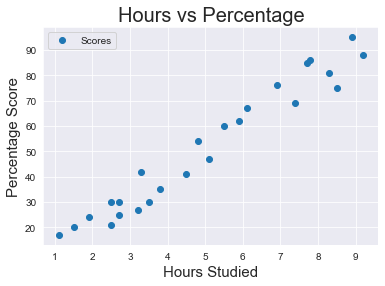

In [12]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage',size=20)  
plt.xlabel('Hours Studied',size=15)  
plt.ylabel('Percentage Score',size=15)  
plt.show()

#### From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score.

### Correlation

In [13]:
data.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Regression Plot

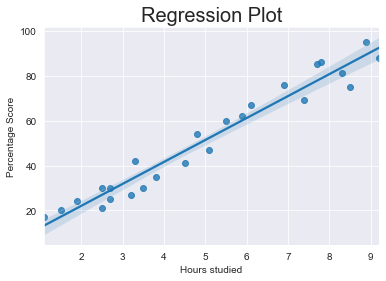

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [14]:
sns.set_style('darkgrid')
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.title('Regression Plot',size=20)
plt.show()
print(data.corr())

## 5.Data Preprocessing

#### Dividing the data into attributes and labels

In [15]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

No of Hours Studied

In [16]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

Scores obtained

In [17]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## 6.Traning the Model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


### Plotting the Line of regression

since our model is trained now, its the time to visualize the best-fit line of regression.

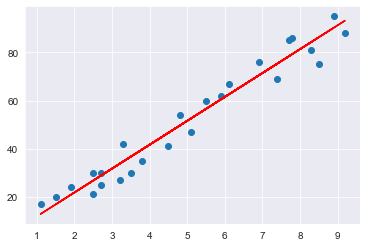

In [19]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

### Making Predictions

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [20]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### 7.Comparing Actual result to the Predicted Model result

In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


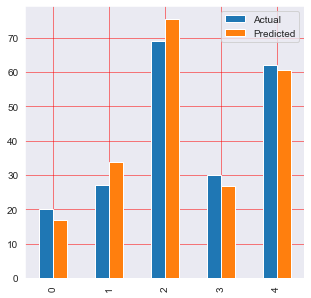

In [23]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

## Testing

In [24]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## 8.Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [25]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.

## Conclusion

### So,According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.

## Thank you....